In [1]:
# In[1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Import tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")
print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
df = pd.read_csv('/content/df_final.csv')
print("Data loaded successfully.")
print(f"Dataset shape: {df.shape}")

# Display the first few rows and column types
print("\nData Head:")
print(df.head())
print("\nData Info:")
df.info()

Data loaded successfully.
Dataset shape: (870, 35)

Data Head:
         DATE  POWER_DEMAND         name    datetime  tempmax  tempmin  temp  \
0  2022-05-01          5993  Delhi,India  2022-05-01     40.0     28.2  33.9   
1  2022-05-02          6123  Delhi,India  2022-05-02     40.0     28.4  34.1   
2  2022-05-03          6127  Delhi,India  2022-05-03     37.7     29.0  33.2   
3  2022-05-04          6121  Delhi,India  2022-05-04     37.2     24.0  31.1   
4  2022-05-05          5371  Delhi,India  2022-05-05     37.0     23.5  30.0   

   feelslikemax  feelslikemin  feelslike  ...  solarenergy  uvindex  \
0          42.3          28.3       34.0  ...         26.7       10   
1          42.0          30.3       35.5  ...         26.4       10   
2          42.1          31.3       36.2  ...         26.4        9   
3          43.1          24.0       33.5  ...         25.0        9   
4          37.6          23.5       30.5  ...         26.4       10   

   severerisk              su

In [4]:
df


,DATE,POWER_DEMAND,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2022-05-01,5993,"Delhi,India",2022-05-01,40.0,28.2,33.9,42.3,28.3,34.0,...,26.7,10,10,2022-05-01T05:40:38,2022-05-01T18:56:20,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
1,2022-05-02,6123,"Delhi,India",2022-05-02,40.0,28.4,34.1,42.0,30.3,35.5,...,26.4,10,10,2022-05-02T05:39:48,2022-05-02T18:56:57,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
2,2022-05-03,6127,"Delhi,India",2022-05-03,37.7,29.0,33.2,42.1,31.3,36.2,...,26.4,9,10,2022-05-03T05:38:59,2022-05-03T18:57:33,0.08,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
3,2022-05-04,6121,"Delhi,India",2022-05-04,37.2,24.0,31.1,43.1,24.0,33.5,...,25.0,9,30,2022-05-04T05:38:11,2022-05-04T18:58:09,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"42182099999,42176099999,VIDP,42139099999,42181..."
4,2022-05-05,5371,"Delhi,India",2022-05-05,37.0,23.5,30.0,37.6,23.5,30.5,...,26.4,10,10,2022-05-05T05:37:24,2022-05-05T18:58:46,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2024-09-14,4683,delhi,2024-09-14,31.0,23.0,26.5,37.6,23.0,29.1,...,21.1,8,10,2024-09-14T06:05:40,2024-09-14T18:27:15,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,VIDP
866,2024-09-15,4630,delhi,2024-09-15,32.0,25.0,28.0,36.7,25.0,31.2,...,21.3,8,10,2024-09-15T06:06:10,2024-09-15T18:26:03,0.41,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,VIDP
867,2024-09-16,5000,delhi,2024-09-16,32.0,26.0,28.8,37.8,26.0,32.2,...,21.5,8,10,2024-09-16T06:06:39,2024-09-16T18:24:51,0.44,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,VIDP
868,2024-09-17,5490,delhi,2024-09-17,33.0,26.0,29.0,38.0,26.0,33.0,...,17.2,8,10,2024-09-17T06:07:08,2024-09-17T18:23:38,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VIDP,VIDD"


Feature Engineering

In [7]:
## check the column names to be sure what your date column is called
print(df.columns.tolist())

# If your date column is named 'DATE' (case-sensitive), use that.
# Otherwise replace 'DATE' below with the correct column name (e.g. 'date' or 'datetime').
date_col = 'DATE'

# Convert the DATE column to datetime (safe: will set invalid parses to NaT)
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')  # errors='coerce' avoids exception on bad values

# Optional: if the Date is actually the index, convert the index instead:
# df.index = pd.to_datetime(df.index, errors='coerce')

# Show rows where conversion failed (helpful for debugging)
bad_dates = df[df[date_col].isna()]
if len(bad_dates):
    print(f"{len(bad_dates)} rows have unparseable dates. Example rows:\n", bad_dates.head())

# Now extract time-based features
df['month'] = df[date_col].dt.month
df['day_of_year'] = df[date_col].dt.dayofyear
df['day_of_week'] = df[date_col].dt.dayofweek   # Monday=0, Sunday=6
df['quarter'] = df[date_col].dt.quarter
df['year'] = df[date_col].dt.year
# weekend: day_of_week >= 5 (Saturday=5, Sunday=6)
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

print("Feature engineering complete. New columns added:")
print(df[[date_col, 'year', 'month', 'day_of_year', 'day_of_week', 'quarter', 'is_weekend']].head())


['DATE', 'POWER_DEMAND', 'name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations']
Feature engineering complete. New columns added:
        DATE  year  month  day_of_year  day_of_week  quarter  is_weekend
0 2022-05-01  2022      5          121            6        2           1
1 2022-05-02  2022      5          122            0        2           0
2 2022-05-03  2022      5          123            1        2           0
3 2022-05-04  2022      5          124            2        2           0
4 2022-05-05  2022      5          125            3        2           0


ColumnTranformer

In [8]:
# In[6]:
# Define the target variable and features
TARGET = 'POWER_DEMAND'

# 1. Identify columns to drop
# 'DATE' is replaced by engineered features
# 'datetime', 'name', 'description', 'icon', 'stations' are identifiers or text
# 'sunrise', 'sunset' are cyclical and captured by day_of_year
drop_cols = ['DATE', 'datetime', 'name', 'description', 'icon', 'stations', 'sunrise', 'sunset']

# 2. Identify numeric and categorical features
# We treat the engineered date features as categorical
categorical_cols = [
    'preciptype', 'conditions', 'month', 'day_of_week', 'quarter', 'year', 'is_weekend'
]

# Numeric features are all other columns, excluding the target and dropped cols
# We get this list by taking all columns, then removing the others
all_cols = df.columns.tolist()
numeric_cols = [c for c in all_cols if c not in drop_cols + categorical_cols + [TARGET]]

print(f"Target: {TARGET}")
print(f"Total Numeric Features: {len(numeric_cols)}")
print(f"Total Categorical Features: {len(categorical_cols)}")

# 3. Create the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Combine pipelines in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'  # This will automatically drop 'drop_cols'
)

print("\nPreprocessing pipeline created successfully.")


Target: POWER_DEMAND
Total Numeric Features: 25
Total Categorical Features: 7

Preprocessing pipeline created successfully.


Train-Test Split (Time-Series Aware)

In [10]:
# In[4]:
# Separate features (X) and target (y)
y = df[TARGET]                     # target column only
X = df.drop(TARGET, axis=1)        # all other columns

# Split the data
# IMPORTANT: shuffle=False is critical for time-series data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Training set shape:   {X_train.shape}")
print(f"Testing set shape:    {X_test.shape}")

# Display date range if DATE column exists
if 'DATE' in df.columns:
    print(f"\nTraining data goes from {X_train['DATE'].min()} to {X_train['DATE'].max()}")
    print(f"Testing data goes from {X_test['DATE'].min()} to {X_test['DATE'].max()}")
else:
    print("\n'DATE' column not found, skipping date range display.")


Training set shape:   (696, 40)
Testing set shape:    (174, 40)

Training data goes from 2022-05-01 00:00:00 to 2024-03-28 00:00:00
Testing data goes from 2024-03-29 00:00:00 to 2024-09-18 00:00:00


Create and Train the XGBoost Model

In [15]:
import xgboost
print(xgboost.__version__)

3.1.1


In [18]:
# In[5]:
# Define the XGBoost model
xgbr = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse'   # define eval_metric here, not in .fit()
)

# Create the full model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgbr)
])

print("Model pipeline created. Starting training...")

# Preprocess the data (fit only on training)
preprocessor = model_pipeline.named_steps['preprocessor']
preprocessor.fit(X_train)
X_train_pre = preprocessor.transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

# Train the model manually (no callbacks/early stopping — not supported in 3.1.1)
xgbr.fit(
    X_train_pre,
    np.ravel(y_train),
    eval_set=[(X_test_pre, np.ravel(y_test))],
    verbose=False
)

# Build final pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgbr)
])

print("Model training complete.")
print(f"Best iteration: {getattr(xgbr.get_booster(), 'best_iteration', 'N/A')}")




Model pipeline created. Starting training...
Model training complete.
Best iteration: N/A


In [19]:
# In[7]:
# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_demand = y_test.mean()
mape = (mae / mean_demand) * 100  # Mean Absolute Percentage Error

# Print performance
print("--- Model Evaluation ---")
print(f"R-squared (R²):     {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} MW")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} MW")
print(f"\nFor context:")
print(f"Mean 'POWER_DEMAND' in Test Set: {mean_demand:.2f} MW")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

--- Model Evaluation ---
R-squared (R²):     0.2400
Mean Absolute Error (MAE): 761.33 MW
Root Mean Squared Error (RMSE): 1110.79 MW

For context:
Mean 'POWER_DEMAND' in Test Set: 6223.03 MW
Mean Absolute Percentage Error (MAPE): 12.23%


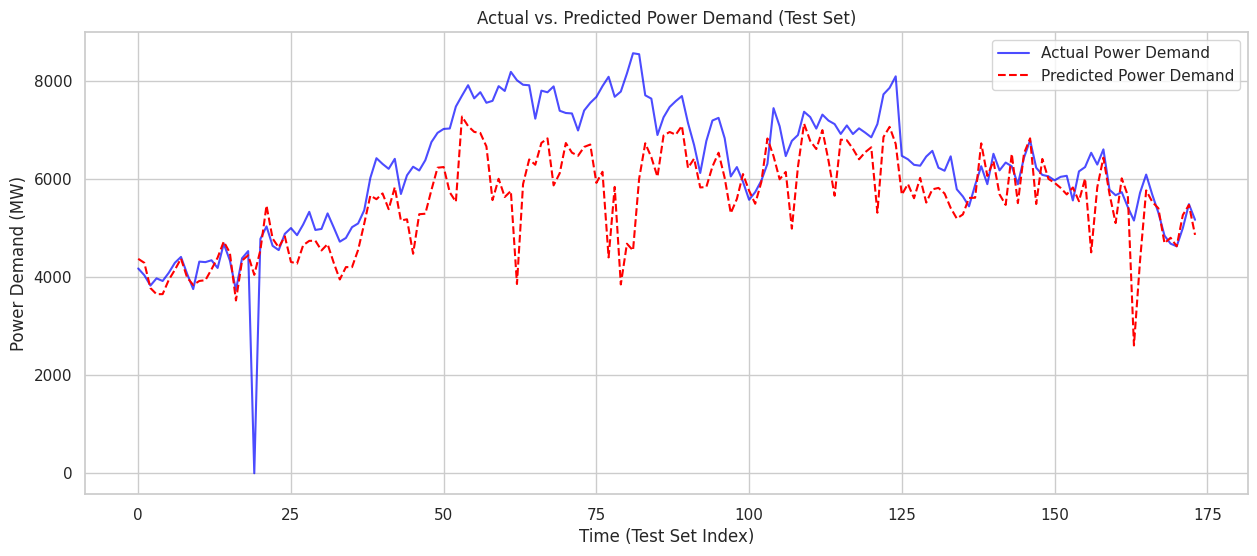


--- Feature Importance ---
                  feature  importance
31           cat__month_1    0.316549
5          num__feelslike    0.118249
28   cat__conditions_Rain    0.082915
3       num__feelslikemax    0.061489
1            num__tempmin    0.029499
4       num__feelslikemin    0.028673
39           cat__month_9    0.024855
58      cat__is_weekend_1    0.021898
53         cat__quarter_4    0.021443
49     cat__day_of_week_6    0.017181
50         cat__quarter_1    0.016707
37           cat__month_7    0.015173
54         cat__year_2022    0.015019
38           cat__month_8    0.014898
2               num__temp    0.014303
16  num__sealevelpressure    0.013639
10       num__precipcover    0.012957
24       num__day_of_year    0.012630
22        num__severerisk    0.010672
57      cat__is_weekend_0    0.009643


/tmp/ipython-input-2267260639.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


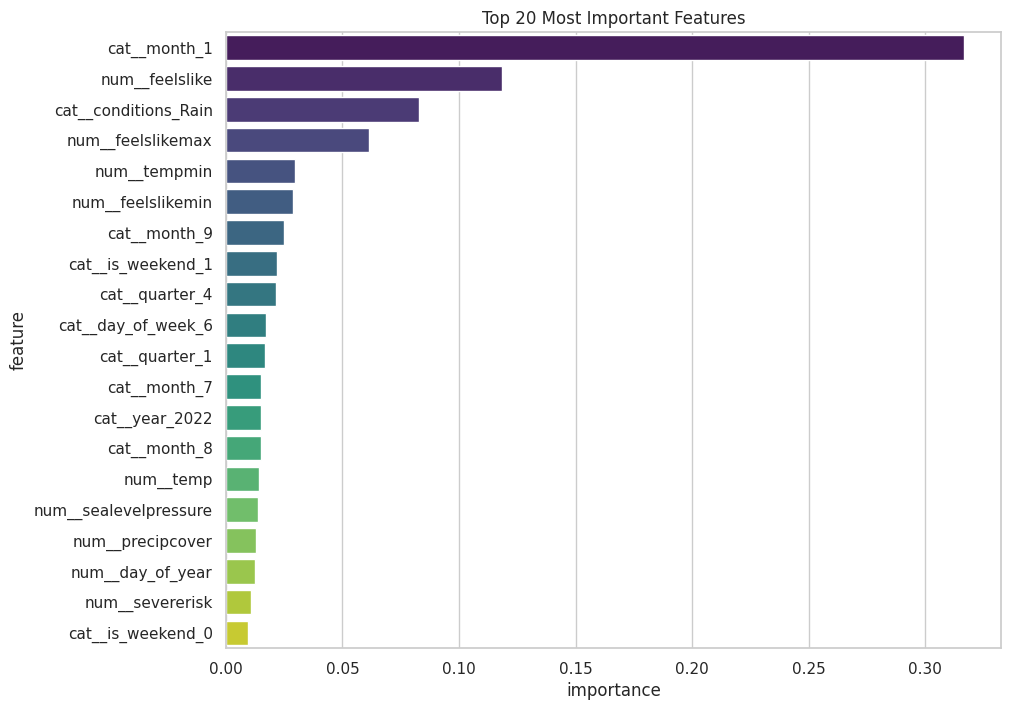

In [20]:
# In[8]:
# 1. Plot Predictions vs. Actuals
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Power Demand', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Power Demand', color='red', linestyle='--')
plt.title('Actual vs. Predicted Power Demand (Test Set)')
plt.ylabel('Power Demand (MW)')
plt.xlabel('Time (Test Set Index)')
plt.legend()
plt.show()

# 2. Plot Feature Importance
print("\n--- Feature Importance ---")

# Get the trained regressor
regressor = model_pipeline.named_steps['regressor']

# Get the feature names from the preprocessor
# This includes the new one-hot-encoded columns
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame of importances
importances = pd.DataFrame({
    'feature': feature_names,
    'importance': regressor.feature_importances_
}).sort_values('importance', ascending=False)

# Display the top 20 features
print(importances.head(20))

# Plot the top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(
    data=importances.head(20),
    x='importance',
    y='feature',
    palette='viridis'
)
plt.title('Top 20 Most Important Features')
plt.show()